In [1]:
!pip install yfinance
import yfinance as yf

In [2]:
IBEX = yf.Ticker("^IBEX")

In [3]:
IBEX_values = IBEX.history(start="2020-01-01", end="2024-12-30")
IBEX_values.to_csv("IBEX_2016_2021.csv")
print(IBEX_values.head())

                                  Open         High          Low        Close  \
Date                                                                            
2020-01-02 00:00:00+01:00  9639.099609  9705.400391  9615.099609  9691.200195   
2020-01-03 00:00:00+01:00  9631.200195  9650.700195  9581.200195  9646.599609   
2020-01-06 00:00:00+01:00  9585.400391  9618.200195  9492.700195  9600.900391   
2020-01-07 00:00:00+01:00  9623.099609  9657.900391  9557.900391  9579.799805   
2020-01-08 00:00:00+01:00  9535.099609  9604.299805  9520.299805  9591.400391   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-01-02 00:00:00+01:00  142379600        0.0           0.0  
2020-01-03 00:00:00+01:00  135130000        0.0           0.0  
2020-01-06 00:00:00+01:00  103520400        0.0           0.0  
2020-01-07 00:00:00+01:00  133476100        0.0           0.0  
2020-01-08 00:00:00+01:00  133957600        0.0 

In [4]:
print("Size of data base:", IBEX_values.shape)

Size of data base: (1279, 7)


In [5]:
print("First:\n", IBEX_values.head(1))
print("\nLast:\n", IBEX_values.tail(1))

First:
                                   Open         High          Low        Close  \
Date                                                                            
2020-01-02 00:00:00+01:00  9639.099609  9705.400391  9615.099609  9691.200195   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-01-02 00:00:00+01:00  142379600        0.0           0.0  

Last:
                               Open          High           Low         Close  \
Date                                                                           
2024-12-27 00:00:00+01:00  11453.0  11531.599609  11421.900391  11531.599609   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-12-27 00:00:00+01:00  78825300        0.0           0.0  


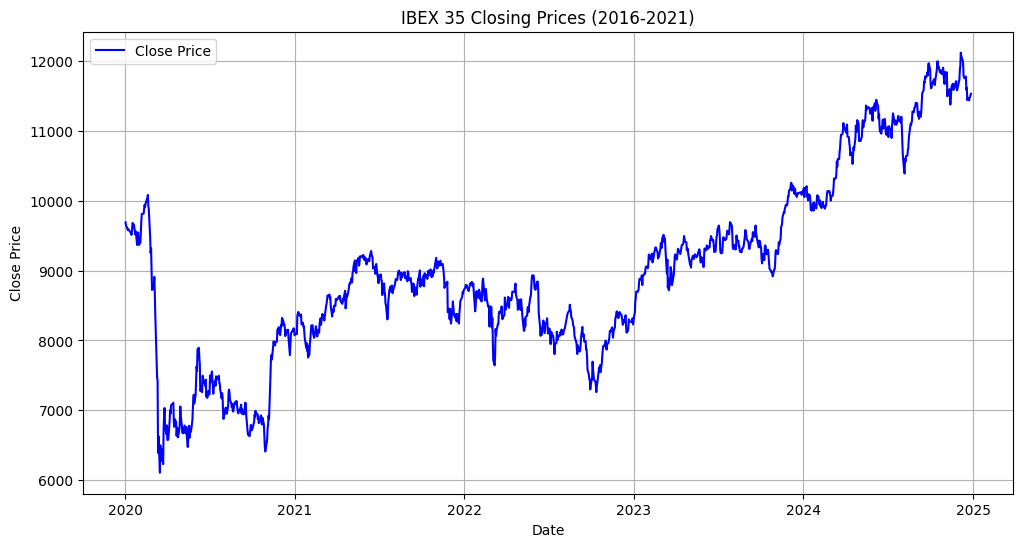

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(IBEX_values.index, IBEX_values['Close'], label='Close Price', color='blue')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("IBEX 35 Closing Prices (2016-2021)")
plt.legend()
plt.grid()
plt.show()

In [7]:
import pandas as pd
!pip install pandas-ta
import pandas_ta as ta
IBEX_values["RSI"] = ta.rsi(IBEX_values["Close"], length=14)

In [8]:
IBEX_values["MACD"], IBEX_values["MACD_signal"], IBEX_values["MACD_hist"] = ta.macd(IBEX_values["Close"]).iloc[:, 0], ta.macd(IBEX_values["Close"]).iloc[:, 1], ta.macd(IBEX_values["Close"]).iloc[:, 2]

bollinger = ta.bbands(IBEX_values["Close"], length=20)
IBEX_values["BB_upper"], IBEX_values["BB_middle"], IBEX_values["BB_lower"] = bollinger["BBU_20_2.0"], bollinger["BBM_20_2.0"], bollinger["BBL_20_2.0"]


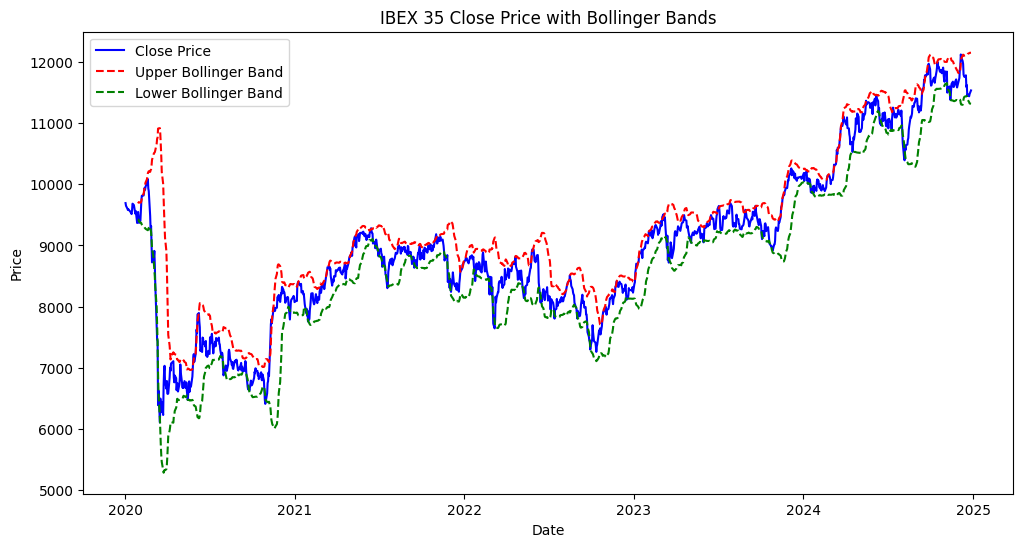

In [9]:
plt.figure(figsize=(12,6))
plt.plot(IBEX_values.index, IBEX_values['Close'], label="Close Price", color="blue")
plt.plot(IBEX_values.index, IBEX_values['BB_upper'], label="Upper Bollinger Band", linestyle="dashed", color="red")
plt.plot(IBEX_values.index, IBEX_values['BB_lower'], label="Lower Bollinger Band", linestyle="dashed", color="green")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("IBEX 35 Close Price with Bollinger Bands")
plt.legend()
plt.show()


In [10]:
!pip install tensorflow
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [11]:
IBEX_values.index = pd.to_datetime(IBEX_values.index)

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))
IBEX_values['Close'] = scaler.fit_transform(IBEX_values[['Close']])

In [13]:
IBEX_values = IBEX_values.tz_localize(None)

train_data = IBEX_values.query('index < "2024-01-01"').reset_index(drop=False)
test_data  = IBEX_values.query('index >= "2024-01-01"').reset_index(drop=False)

print(train_data.head())
print(test_data.head())

        Date         Open         High          Low     Close     Volume  \
0 2020-01-02  9639.099609  9705.400391  9615.099609  0.596191  142379600   
1 2020-01-03  9631.200195  9650.700195  9581.200195  0.588771  135130000   
2 2020-01-06  9585.400391  9618.200195  9492.700195  0.581169  103520400   
3 2020-01-07  9623.099609  9657.900391  9557.900391  0.577659  133476100   
4 2020-01-08  9535.099609  9604.299805  9520.299805  0.579589  133957600   

   Dividends  Stock Splits  RSI  MACD  MACD_signal  MACD_hist  BB_upper  \
0        0.0           0.0  NaN   NaN          NaN        NaN       NaN   
1        0.0           0.0  NaN   NaN          NaN        NaN       NaN   
2        0.0           0.0  NaN   NaN          NaN        NaN       NaN   
3        0.0           0.0  NaN   NaN          NaN        NaN       NaN   
4        0.0           0.0  NaN   NaN          NaN        NaN       NaN   

   BB_middle  BB_lower  
0        NaN       NaN  
1        NaN       NaN  
2        NaN     

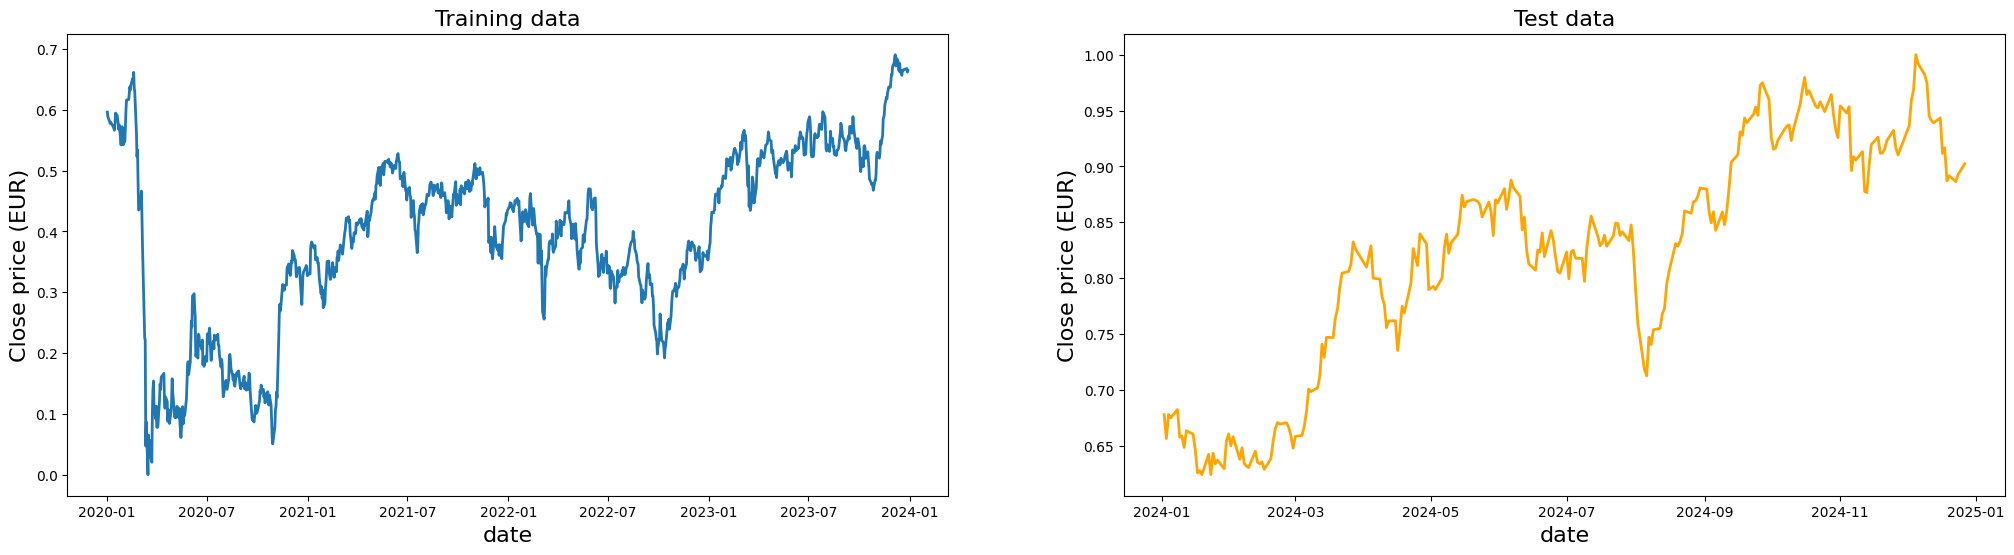

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 6))
ax1.plot(train_data.Date, train_data['Close'], lw=2)
ax1.set_xlabel("date", fontsize=16)
ax1.set_ylabel("Close price (EUR)", fontsize=16)
ax1.set_title("Training data", fontsize=16)
ax2.plot(test_data.Date, test_data['Close'], c='orange', lw=2)
ax2.set_xlabel("date", fontsize=16)
ax2.set_ylabel("Close price (EUR)", fontsize=16)
ax2.set_title("Test data", fontsize=16);

In [15]:
X_train = train_data.Date
y_train = train_data['Close']

X_test = test_data.Date
y_test = test_data['Close']

n_features = 1

train_series = y_train.values.reshape((len(y_train), n_features))
test_series  = y_test.values.reshape((len(y_test), n_features))

In [16]:
train_series = np.array(train_data["Close"]).reshape(-1, 1)
test_series = np.array(test_data["Close"]).reshape(-1, 1)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_series = scaler.fit_transform(train_series)
test_series = scaler.transform(test_series)

In [18]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM

look_back = 20
batch_size = 10

# Create time series generators
train_generator = TimeseriesGenerator(train_series, train_series, length=look_back, batch_size=batch_size)
test_generator = TimeseriesGenerator(test_series, test_series, length=look_back, batch_size=batch_size)


In [20]:

n_neurons = 50
n_features = 1

model = Sequential()
model.add(LSTM(n_neurons, input_shape=(look_back, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [21]:
model.fit(train_generator, epochs=50, verbose=1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0518
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0064
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0053
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0031
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0029
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0023
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0023
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0018
Epoch 9/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0023
Epoch 10/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0029
Epoch 11/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0019
Epoch 12/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0026
Epoch 13/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0021
Epoch 14/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0015
Epoch 15/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss:

In [22]:
train_predictions = model.predict(train_generator)
test_predictions = model.predict(test_generator)


train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
test_series_actual = scaler.inverse_transform(test_series[look_back:])

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


1. Root Mean Squared Error (RMSE)

  Measures the average prediction error in the same unit as the original prices.
  Lower RMSE → Better model performance.

2. Mean Absolute Percentage Error (MAPE)

  Shows percentage-based error, making it easier to compare across different datasets.
  Lower MAPE → More accurate predictions.

3. R-squared Score (R² Score)

  Measures how well the model explains variance in the actual data.
  Closer to 1 → Model fits well; closer to 0 → Poor model fit.

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(test_series_actual, test_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_series_actual, test_predictions)
r2 = r2_score(test_series_actual, test_predictions)

print("🔍 Model Evaluation Metrics:")
print(f"📏 Mean Squared Error (MSE): {mse:.2f}")
print(f"📏 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📏 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📈 R-squared (R² Score): {r2:.4f}")


🔍 Model Evaluation Metrics:
📏 Mean Squared Error (MSE): 0.00
📏 Root Mean Squared Error (RMSE): 0.02
📏 Mean Absolute Error (MAE): 0.01
📈 R-squared (R² Score): 0.9579


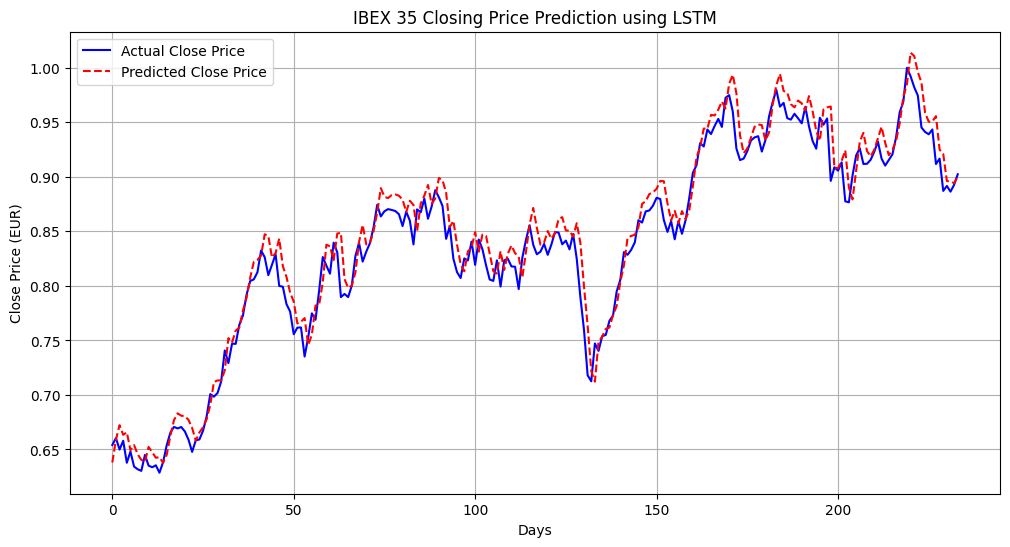

In [24]:
plt.figure(figsize=(12,6))
plt.plot(test_series_actual, label="Actual Close Price", color="blue")
plt.plot(test_predictions, label="Predicted Close Price", color="red", linestyle="dashed")
plt.xlabel("Days")
plt.ylabel("Close Price (EUR)")
plt.title("IBEX 35 Closing Price Prediction using LSTM")
plt.legend()
plt.grid(True)
plt.show()

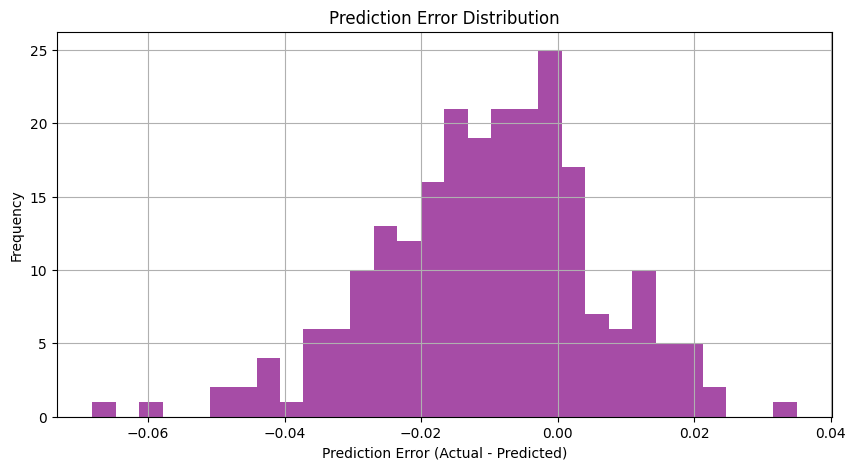

In [25]:
plt.figure(figsize=(10,5))
errors = test_series_actual.flatten() - test_predictions.flatten()
plt.hist(errors, bins=30, color="purple", alpha=0.7)
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Prediction Error Distribution")
plt.grid(True)
plt.show()

In [26]:
train_predictions = model.predict(train_generator)
test_predictions = model.predict(test_generator)

# Rescale predictions back to original price scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [27]:
test_series_actual = scaler.inverse_transform(test_series[look_back:])

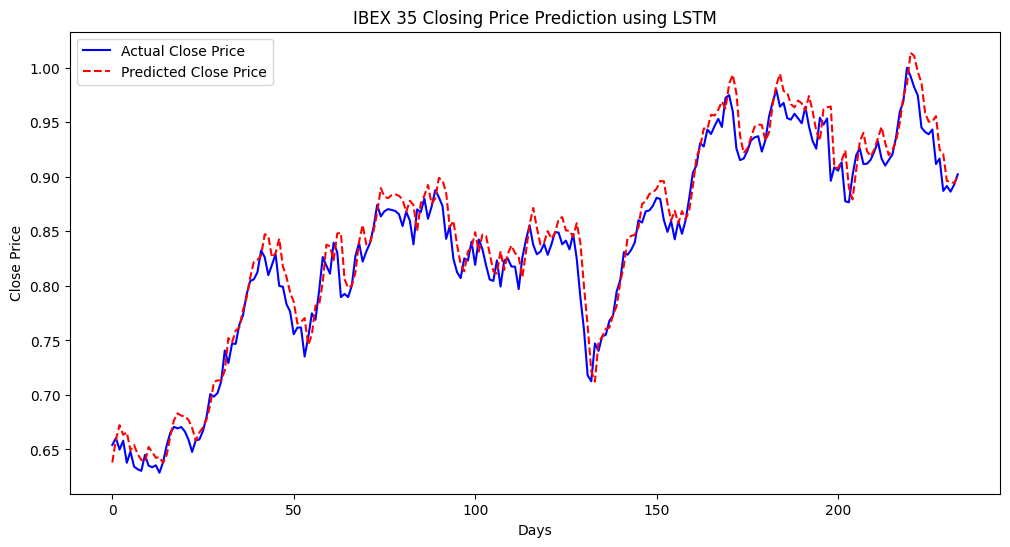

In [28]:
plt.figure(figsize=(12,6))
plt.plot(test_series_actual, label="Actual Close Price", color="blue")
plt.plot(test_predictions, label="Predicted Close Price", color="red", linestyle="dashed")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.title("IBEX 35 Closing Price Prediction using LSTM")
plt.legend()
plt.show()

In [29]:
test_data["Date"] = pd.to_datetime(test_data["Date"])

actual_last_close = test_data["Close"].iloc[-1]
predicted_last_close = test_predictions[-1][0]


In [30]:

last_date = test_data["Date"].iloc[-1]


<ipython-input-32-b1f2040b2135>:4: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(last_date, predicted_last_close, color="red", label="Predicted Last Close Price", s=150, marker="x", edgecolors="black")


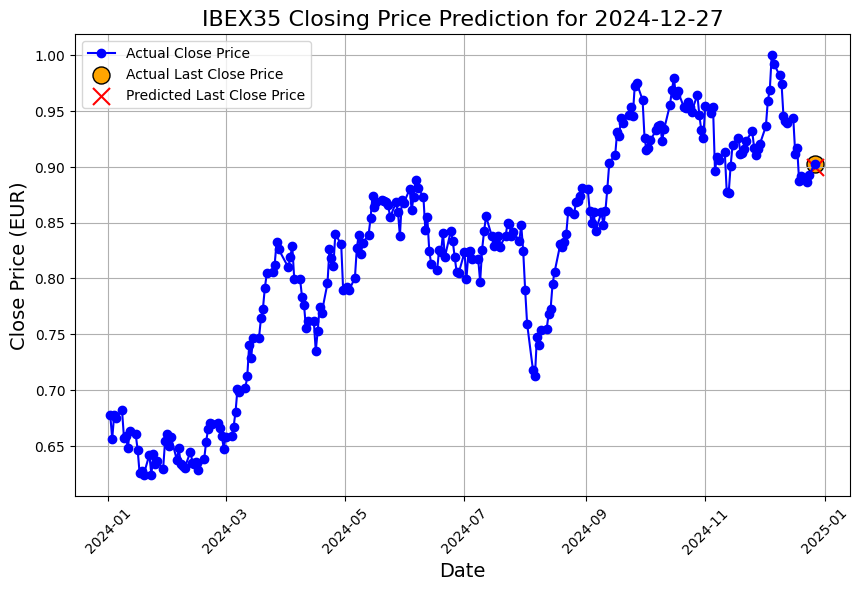

In [32]:

plt.figure(figsize=(10, 6))
plt.plot(test_data["Date"], test_data["Close"], label="Actual Close Price", color="blue", marker="o", linestyle="-")
plt.scatter(last_date, actual_last_close, color="orange", label="Actual Last Close Price", s=150, marker="o", edgecolors="black")
plt.scatter(last_date, predicted_last_close, color="red", label="Predicted Last Close Price", s=150, marker="x", edgecolors="black")
plt.xticks(rotation=45)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close Price (EUR)", fontsize=14)
plt.title(f"IBEX35 Closing Price Prediction for {last_date.date()}", fontsize=16)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [33]:

print(f"📊 Last Day ({last_date.date()}) - Actual Close Price: {actual_last_close:.2f} EUR")
print(f"🔮 Last Day ({last_date.date()}) - Predicted Close Price: {predicted_last_close:.2f} EUR")


📊 Last Day (2024-12-27) - Actual Close Price: 0.90 EUR
🔮 Last Day (2024-12-27) - Predicted Close Price: 0.90 EUR
